## Data Description:

We use the following representation to collect the dataset

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - hemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. class - class

In [287]:
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [249]:
data = pd.read_excel('C:\\Users\\prems\\project\\kidney_disease.xlsx')

In [250]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [251]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Exploratory data analysis (EDA)
1) For numeric data

   Correlation plot
    
   Pivot table comparing survival rate across numeric variables
    
2) For Categorical Data

   Made bar charts to understand balance of classes
   

In [253]:
data_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo']]
data_cat = data[['rbc','pc','pcc','ba','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

In [254]:
filna = data[['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']]

<AxesSubplot:>

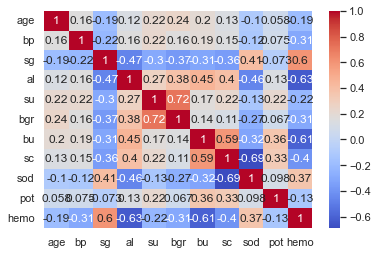

In [255]:
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')

In [256]:
pd.pivot_table(data, index='classification', values=data_num)

,age,al,bgr,bp,bu,hemo,pot,sc,sg,sod,su
classification,,,,,,,,,,,
ckd,54.425000,1.721154,175.523810,79.705882,72.656170,10.652217,4.883030,4.430720,1.013937,133.882530,0.770732
ckd\t,68.500000,2.000000,164.500000,70.000000,41.000000,9.700000,4.500000,2.550000,1.010000,135.500000,0.000000
notckd,46.516779,0.000000,107.722222,71.351351,32.798611,15.188194,4.337931,0.868966,1.022414,141.731034,0.000000


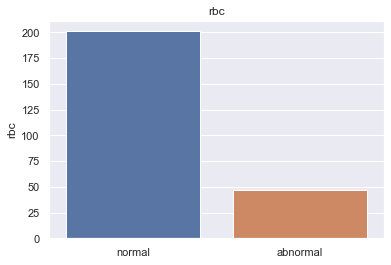

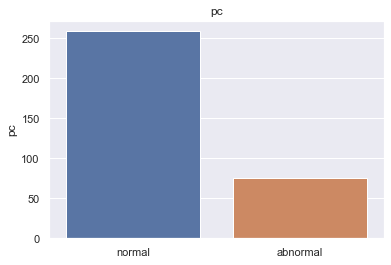

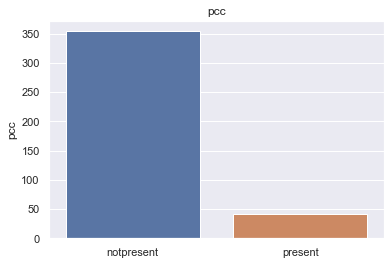

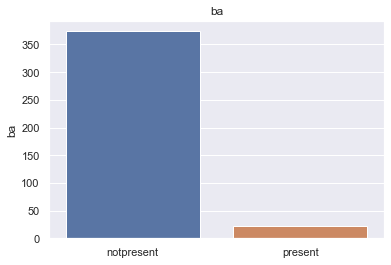

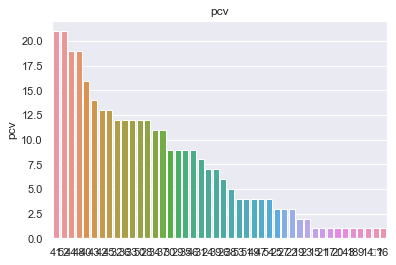

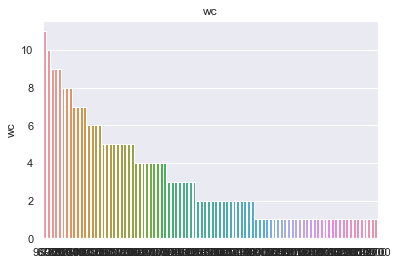

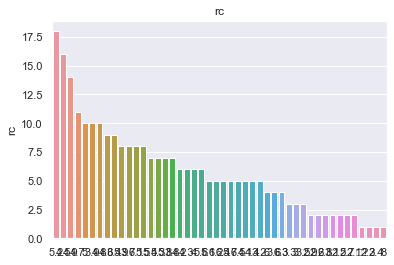

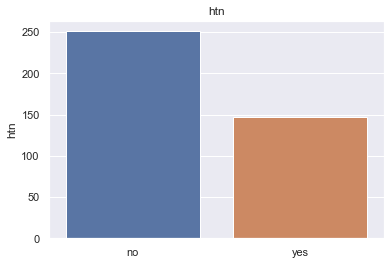

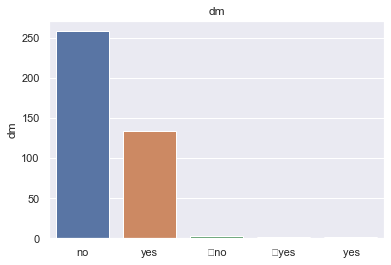

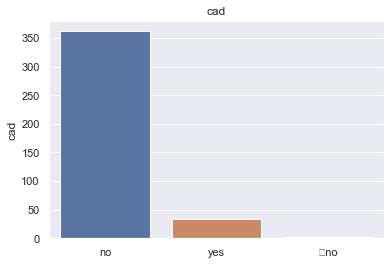

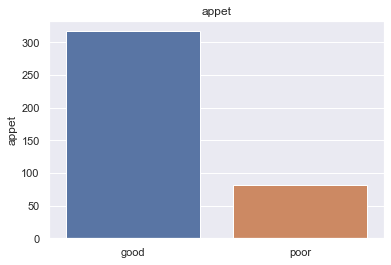

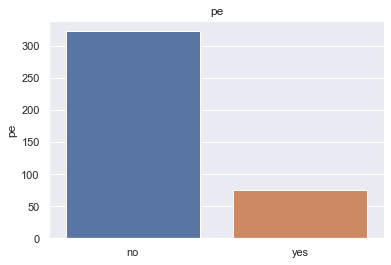

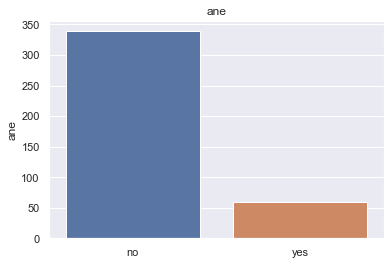

In [257]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show()

In [258]:
print(data.classification.value_counts())
data.classification.replace("ckd\t","ckd",inplace=True)
print(data.classification.value_counts())
print("==="*20)
print(data.dm.value_counts())
data.dm.replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)
print(data.dm.value_counts())
print("==="*20)
print(data.cad.value_counts())
data.cad.replace(["\tno"],["no"],inplace=True)
print(data.cad.value_counts())

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64
ckd       250
notckd    150
Name: classification, dtype: int64
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64
no     261
yes    137
Name: dm, dtype: int64
no      362
yes      34
\tno      2
Name: cad, dtype: int64
no     364
yes     34
Name: cad, dtype: int64


## Data Preprocessing
1. deal with unwanted text.
2. deal with missing values
3. histogram
4. heatmap
5. pivot_table

In [259]:
data.rc.replace("\t?",data.rc.mode()[0], inplace=True)
data.rc = data.rc.apply(lambda x: float(x))

data.wc.replace("\t?",data.wc.mode()[0], inplace=True)
data.wc = data.wc.apply(lambda x: float(x))


data.pcv.replace(["\t?","\t43"],data.pcv.mode()[0], inplace=True)
data.pcv = data.pcv.apply(lambda x: float(x))

data.classification.replace(["ckd","notckd"],[1,0], inplace=True)

In [260]:
data_final_num = data[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']]
data_fincal_cat = data[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']]

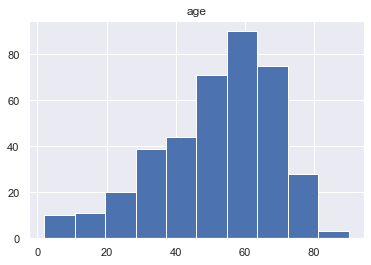

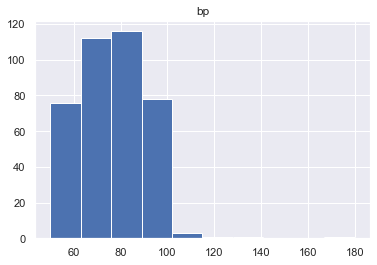

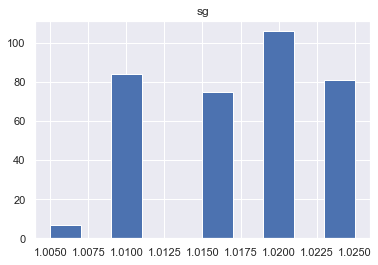

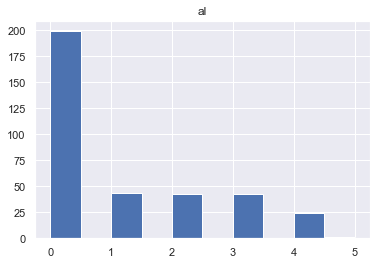

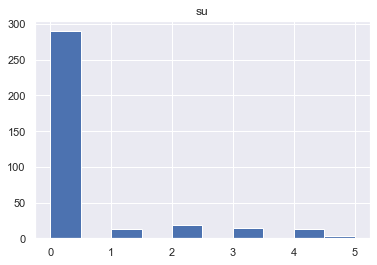

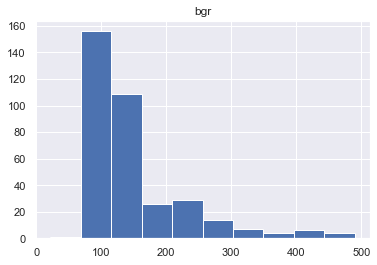

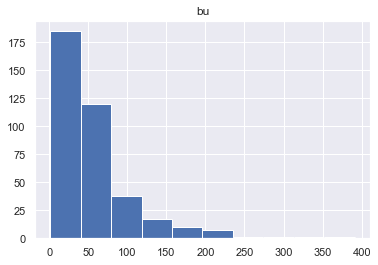

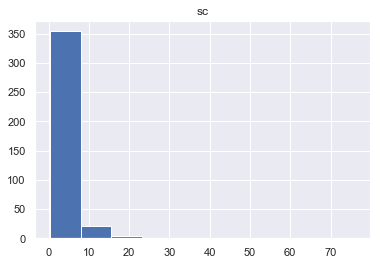

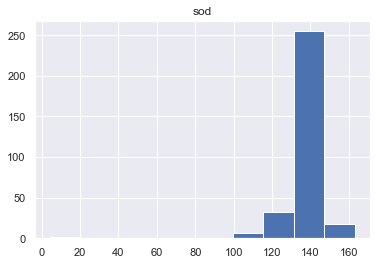

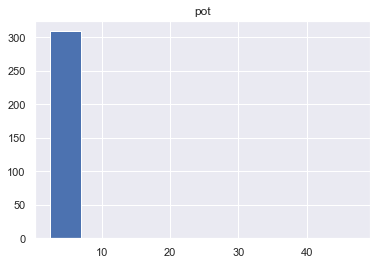

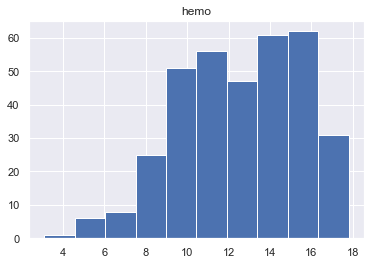

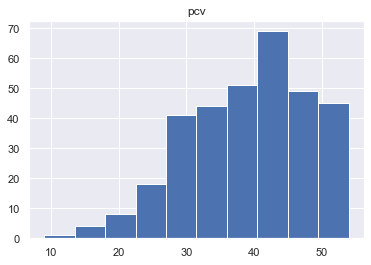

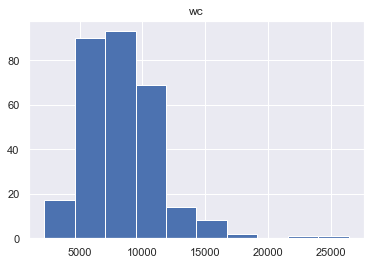

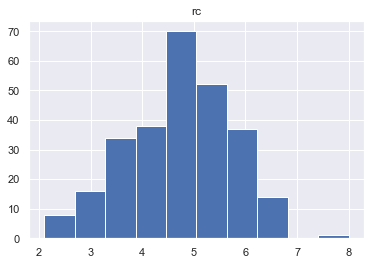

In [261]:
for i in data_final_num.columns:
    plt.hist(data_final_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

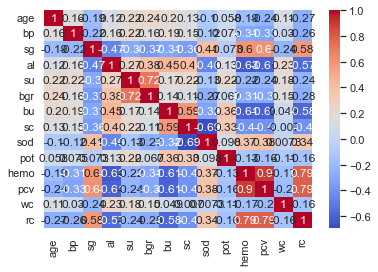

In [262]:
sns.heatmap(data_final_num.corr(), annot=True, cmap='coolwarm')

In [263]:
pd.pivot_table(data, index='classification', values=['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'])

,age,al,bgr,bp,bu,hemo,pcv,pot,rc,sc,sg,sod,su,wc
classification,,,,,,,,,,,,,,
0,46.516779,0.000000,107.722222,71.351351,32.798611,15.188194,46.335616,4.337931,5.379021,0.868966,1.022414,141.731034,0.00000,7705.594406
1,54.541322,1.722488,175.419811,79.625000,72.389030,10.647549,32.972826,4.878443,3.955118,4.414916,1.013918,133.901786,0.76699,9074.342105


In [264]:
for i in data_fincal_cat:
    print(pd.pivot_table(data,index='classification',columns=i, values='age'))
    print("=="*20)

rbc              abnormal     normal
classification                      
0                     NaN  46.056738
1               52.068182  54.610169
pc               abnormal     normal
classification                      
0                     NaN  46.056738
1               55.148649  52.373913
pcc             notpresent    present
classification                       
0                46.682759        NaN
1                53.530000  59.357143
ba              notpresent    present
classification                       
0                46.682759        NaN
1                54.540909  54.545455
htn                    no        yes
classification                      
0               46.408163        NaN
1               46.020000  60.542254
dm                     no        yes
classification                      
0               46.408163        NaN
1               47.541284  60.278195
cad                    no        yes
classification                      
0               46.408163     

In [265]:
# dealing with missing values
for i in filna.columns:
    if data[i].isna().sum() > 0 :
        if data[i].dtype == 'float64':
            data[i].fillna(data[i].median(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)


## Data Normalization

1. percentile(interquartile range)
2. boxplot  

In [266]:
def outlinefree(dataCol):    
    sorted(dataCol)
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1   
    LowerRange = Q1-(1.5 * IQR)   
    UpperRange = Q3+(1.5 * IQR)   
    return LowerRange,UpperRange

In [267]:
Lowage,Upage = outlinefree(data.age)
Lowbp,Upbp = outlinefree(data.bp)
Lowsg,Upsg = outlinefree(data.sg)
Lowal,Upal = outlinefree(data.al)
Lowsu,Upsu = outlinefree(data.su)
Lowbgr,Upbgr = outlinefree(data.bgr)
Lowbu,Upbu = outlinefree(data.bu)
Lowsc,Upsc = outlinefree(data.sc)
Lowsod,Upsod = outlinefree(data.sod)
Lowpot,Uppot = outlinefree(data.pot)
Lowhemo,Uphemo = outlinefree(data.hemo)
Lowpcv,Uppcv = outlinefree(data.pcv)
Lowwc,Upwc = outlinefree(data.wc)
Lowrc,Uprc = outlinefree(data.rc)

In [268]:
data.age.replace(list(data[(data.age < Lowage)].age),Lowage , inplace=True)
data.age.replace(list(data[(data.age > Upage)].age),Upage , inplace=True)

data.bp.replace(list(data[(data.bp < Lowbp)].bp),Lowbp , inplace=True)
data.bp.replace(list(data[(data.bp > Upbp)].bp),Upbp , inplace=True)

data.sg.replace(list(data[(data.sg < Lowsg)].sg),Lowsg , inplace=True)
data.sg.replace(list(data[(data.sg > Upsg)].sg),Upsg , inplace=True)

data.al.replace(list(data[(data.al < Lowal)].al),Lowal , inplace=True)
data.al.replace(list(data[(data.al > Upal)].al),Upal , inplace=True)

data.su.replace(list(data[(data.su < Lowsu)].su),Lowsu , inplace=True)
data.su.replace(list(data[(data.su > Upsu)].su),Upsu , inplace=True)

data.bgr.replace(list(data[(data.bgr < Lowbgr)].bgr),Lowbgr , inplace=True)
data.bgr.replace(list(data[(data.bgr > Upbgr)].bgr),Upbgr , inplace=True)

data.bu.replace(list(data[(data.bu < Lowbu)].bu),Lowbu , inplace=True)
data.bu.replace(list(data[(data.bu > Upbu)].bu),Upbu , inplace=True)

data.sc.replace(list(data[(data.sc < Lowsc)].sc),Lowbu , inplace=True)
data.sc.replace(list(data[(data.sc > Upsc)].sc),Upbu , inplace=True)

data.sod.replace(list(data[(data.sod < Lowsod)].sod),Lowsod , inplace=True)
data.sod.replace(list(data[(data.sod > Upsod)].sod),Upsod , inplace=True)

data.pot.replace(list(data[(data.pot < Lowpot)].pot),Lowpot , inplace=True)
data.pot.replace(list(data[(data.pot > Uppot)].pot),Uppot , inplace=True)

data.hemo.replace(list(data[(data.hemo < Lowhemo)].hemo),Lowhemo , inplace=True)
data.hemo.replace(list(data[(data.hemo > Uphemo)].hemo),Uphemo , inplace=True)

data.pcv.replace(list(data[(data.pcv < Lowpcv)].pcv),Lowpcv , inplace=True)
data.pcv.replace(list(data[(data.pcv > Uppcv)].pcv),Uppcv , inplace=True)

data.wc.replace(list(data[(data.wc < Lowwc)].wc),Lowwc , inplace=True)
data.wc.replace(list(data[(data.wc > Upwc)].wc),Upwc , inplace=True)

data.rc.replace(list(data[(data.rc < Lowrc)].rc),Lowrc , inplace=True)
data.rc.replace(list(data[(data.rc > Uprc)].rc),Uprc , inplace=True)

In [269]:
finaldata = data.loc[:,['classification','age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane']]

## Model Building

In [270]:
final_dataset = pd.get_dummies(finaldata)

In [271]:
features = final_dataset.iloc[:,1:].values
label = final_dataset.iloc[:,0].values

In [272]:
x_train, x_test, y_train, y_test = train_test_split(features,label, test_size=0.33, random_state=100)

In [273]:
#LogisticRegression
lr = LogisticRegression()  
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Training accuracy:', lr.score(x_train, y_train))
print('Testing accuracy:', lr.score(x_test, y_test))

Training accuracy: 0.9253731343283582
Testing accuracy: 0.9242424242424242


In [274]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Training accuracy:', knn.score(x_train, y_train))
print('Testing accuracy:', knn.score(x_test, y_test))

Training accuracy: 0.832089552238806
Testing accuracy: 0.7121212121212122


In [275]:
#NaiveBayers
nb = GaussianNB()  
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
print('Training accuracy:', nb.score(x_train, y_train))
print('Testing accuracy:', nb.score(x_test, y_test))

Training accuracy: 0.9589552238805971
Testing accuracy: 0.9696969696969697


In [297]:
#SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Training accuracy:', svc.score(x_train, y_train))
print('Testing accuracy:', svc.score(x_test, y_test))

Training accuracy: 0.5970149253731343
Testing accuracy: 0.6818181818181818


In [298]:
#DecisionTree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
print('Training accuracy:', dt.score(x_train, y_train))
print('Testing accuracy:', dt.score(x_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9621212121212122


In [299]:
#RandomForest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
print('Training accuracy:', rf.score(x_train, y_train))
print('Testing accuracy:', rf.score(x_test, y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


## Prediction

In [286]:
prediction = rf.predict([x_test[7]])
if (prediction[0]==0):
    print('CKD')
else:
    print('NO CKD')

CKD


[[59.    70.     1.01  ...  0.     1.     0.   ]
 [61.    70.     1.025 ...  0.     1.     0.   ]
 [17.    70.     1.015 ...  0.     1.     0.   ]
 ...
 [58.    95.     1.01  ...  0.     1.     0.   ]
 [56.    90.     1.01  ...  1.     0.     1.   ]
 [54.    90.     1.025 ...  1.     0.     1.   ]]
